# The Rise & Fall of Business Confidence in Mexico

In [74]:
import sys
import os
import pandas as pd
import numpy as np


# For creating cool charts :)
import matplotlib.pyplot as plt
from matplotlib import image
import matplotlib as mpl
from dateutil.relativedelta import relativedelta
from highlight_text import ax_text
import matplotlib.ticker as mtick

# We load pre-defined functions, fonts and stylesheet.
module_path = os.path.abspath(os.path.join('../../../'))
if module_path not in sys.path:
    sys.path.append(module_path+"\\utils")
    sys.path.append(module_path+"\\assets")

from tukan_helper_functions import *

path = [x for x in sys.path if "utils" in x][0]

# Optional for TUKAN's mplstylesheet
plt.style.use(module_path + '\\utils\\tukan_style.mpl')

In [18]:
# Load the Comfortaa style

path = [x for x in sys.path if "assets" in x][0] + "\\fonts\\Dosis\\"

for x in os.listdir(path):
    if x.split(".")[-1] == "ttf":
        fm.fontManager.addfont(path + "/" + x)
        try:
            fm.FontProperties(weight=x.split(
                "-")[-1].split(".")[0].lower(), fname=x)
        except:
            x

In [28]:
import locale
locale.setlocale(locale.LC_ALL, 'es_es')

'es_es'

In [51]:
import matplotlib.dates as mdates


In [85]:
payload =  {
    "type": "data_table",
    "operation": "sum",
    "language": "es",
    "group_by": [
        "economic_activity"
    ],
    "categories": {
        "economic_activity": [
            "457155464609a2f",
            "faa2a8d0af8a72c",
            "1d0185629b65ee3",
            "e426cc87d0540ab",
            "29daaeb36fea1ab",
            "d35f5b82779e7d5",
            "3726993cc9fecab",
            "4adeefc3d481a07",
            "a07267f78158c2c",
            "feb7bb4445c808d"
        ]
    },
    "request": [
        {
            "table": "mex_inegi_emoe",
            "variables": [
                "1b0f1ce9956876e"
            ]
        }
    ],
    "from": "2018-01-01"
}

response = get_tukan_api_request(payload)
data = response["data"]

Success getting the data


In [86]:
data[["economic_activity","economic_activity__ref"]].drop_duplicates()

,economic_activity,economic_activity__ref
0,Comercio,1d0185629b65ee3
1,Otros,29daaeb36fea1ab
2,Servicios de apoyo a los negocios y manejo de ...,3726993cc9fecab
3,Construcción,457155464609a2f
4,Servicios privados no financieros,4adeefc3d481a07
5,"Servicios profesionales, científicos y técnicos",a07267f78158c2c
6,Servicios de alojamiento temporal y de prepara...,d35f5b82779e7d5
7,Información en medios masivos,e426cc87d0540ab
8,Industrias manufactureras,faa2a8d0af8a72c
9,"Transportes, correos y almacenamiento",feb7bb4445c808d


In [87]:
language = "es"

In [88]:
if language == "es":
    data.replace({"economic_activity":{
        "Servicios de apoyo a los negocios y manejo de residuos, y servicios de remediación": "Serv. de apoyo a negocios",
        "Servicios de alojamiento temporal y de preparación de alimentos y bebidas": "Hoteles y restaurantes",
        "Servicios profesionales, científicos y técnicos": "Serv. profesionales y técnicos", "Transportes, correos y almacenamiento":"Transporte"}}, inplace = True)
else:
    data.replace({"economic_activity":{
        "Administrative and support and waste management and remediation services": "Admin. & waste management services",
        "Professional, scientific, and technical services": "Professional & technical services"}}, inplace = True)
sort_categories = data[data["date"] == data["date"].max()].copy()
sort_categories = sort_categories.sort_values(by = "1b0f1ce9956876e", ascending = False)

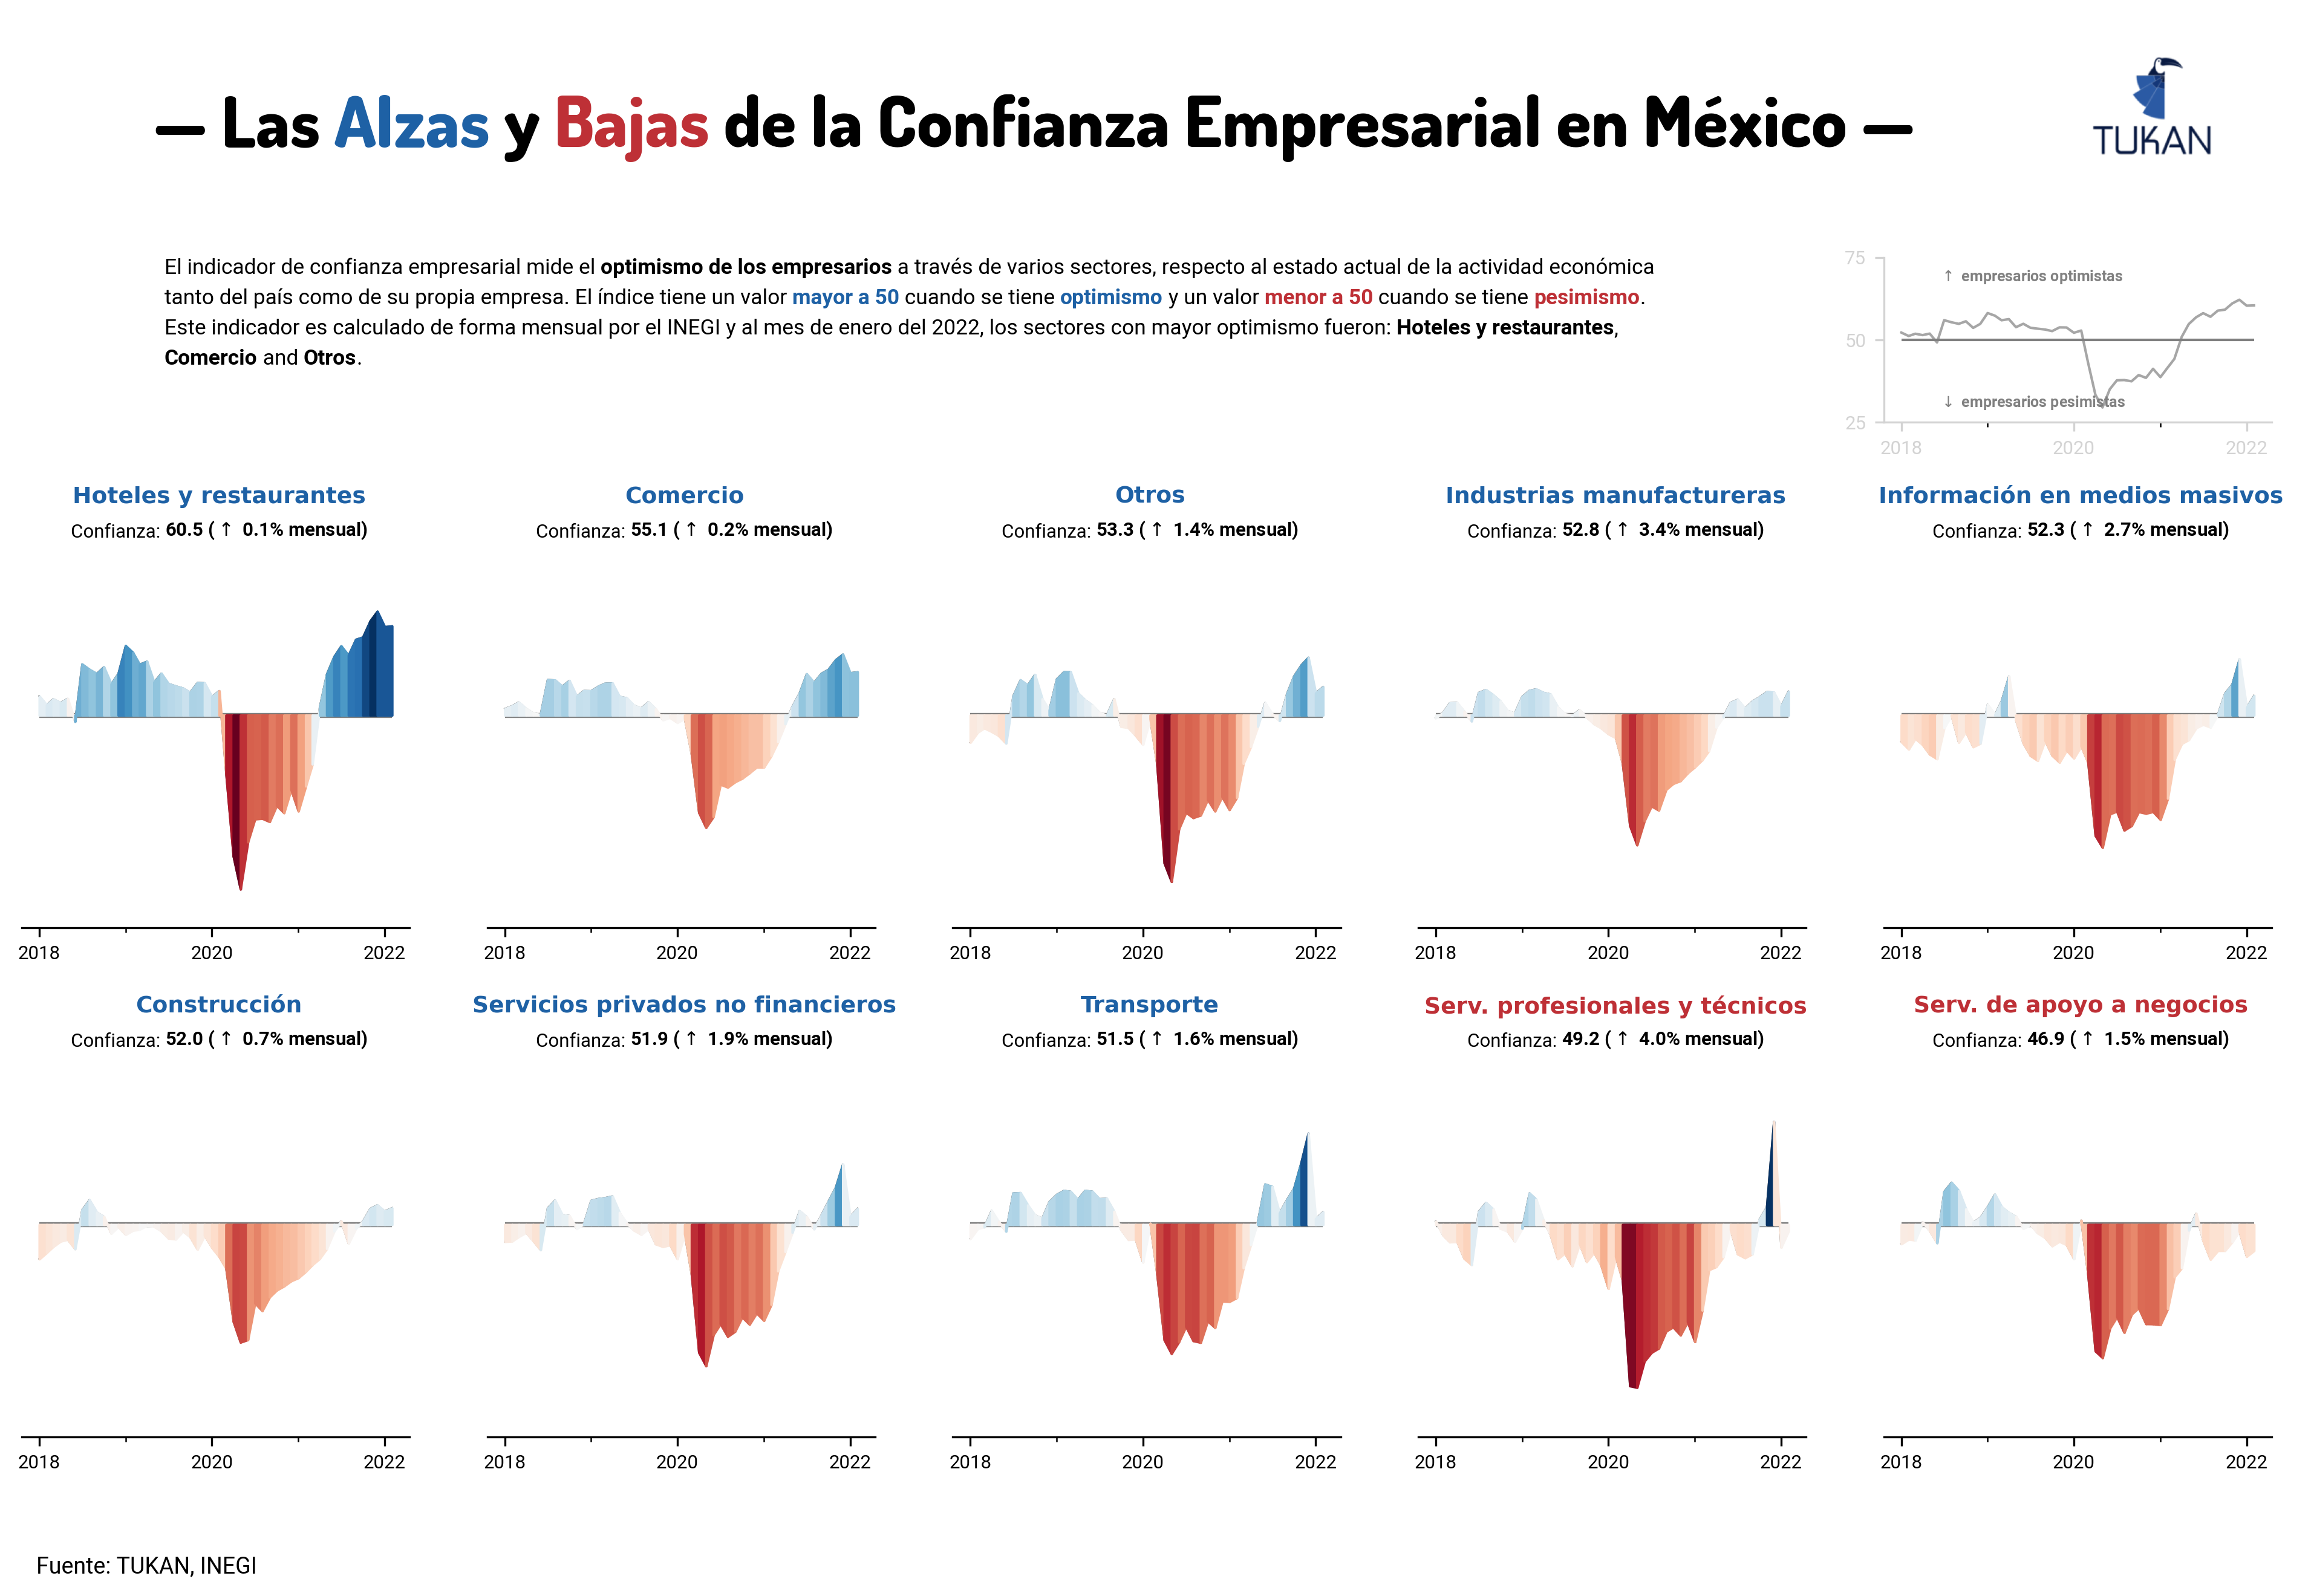

In [101]:
# Economic activities
sectors = sort_categories["economic_activity"]

# Description text
s_1 = sectors.iloc[0]
s_2 = sectors.iloc[1]
s_3 = sectors.iloc[2]


if language == "es":
    title = f"— Las <Alzas> y <Bajas> de la Confianza Empresarial en México —"
    source_text = "Fuente: TUKAN, INEGI"
    subtitle = f"El indicador de confianza empresarial mide el <optimismo de los empresarios> a través de varios sectores, respecto al estado actual de la actividad económica \ntanto del país como de su propia empresa. El índice tiene un valor <mayor a 50> cuando se tiene <optimismo> y un valor <menor a 50> cuando se tiene <pesimismo>.\nEste indicador es calculado de forma mensual por el INEGI y al mes de enero del 2022, los sectores con mayor optimismo fueron: <{s_1}>,\n<{s_2}> and <{s_3}>."
    alt_text_1 = r"$\uparrow$ empresarios optimistas"
    alt_text_2 = r"$\downarrow$ empresarios pesimistas"
    confidence_text = "Confianza"
else:
    title = f"— The <Rise> & <Fall> of Business Confidence in Mexico —"
    source_text = "Source: TUKAN, INEGI"
    subtitle = f"The business confidence indicator measures the <confidence of executives> across a variety of sectors (mainly manufacturing), on the current state of economic activity \nfor both the country and their company. The index has a value <greater than 50> when there is <optimism> for economic activity and a value <below 50> when there is <pessimism>.\nThis indicator is computed on a monthly basis by INEGI and as of January 2022, the sectors with most optimism were: <{s_1}>,\n<{s_2}> and <{s_3}>."
    alt_text_1 = r"$\uparrow$ optimistic executives"
    alt_text_2 = r"$\downarrow$ pessimisstic executives"
    confidence_text = "Confidence"

fig = plt.figure(figsize=(16,10), dpi = 300, facecolor="white")
outer_gspec = mpl.gridspec.GridSpec(
    ncols = 5, nrows = 3, height_ratios = [0.1, .15, .85], figure = fig
)

title_spec = mpl.gridspec.GridSpecFromSubplotSpec(ncols = 1, nrows = 1, subplot_spec=outer_gspec[0,:])
desc_spec = mpl.gridspec.GridSpecFromSubplotSpec(ncols = 5, nrows = 1, subplot_spec=outer_gspec[1,:])
gspec = mpl.gridspec.GridSpecFromSubplotSpec(ncols = 5, nrows = 2, subplot_spec=outer_gspec[2,:])


# Global parameters
X_min = data["date"].min()
X_max = data["date"].max()
center_date = X_min + ((X_max + relativedelta(months=1)) - X_min)/2

# Select the color map:
cmap = mpl.cm.RdBu
normalize = mpl.colors.TwoSlopeNorm(vmin=data["1b0f1ce9956876e"].min(), vmax=data["1b0f1ce9956876e"].max(), vcenter = 50)


aux_count = 0
for i in range(2):
    for j in range(5):
        aux_df = data[data["economic_activity"] == sectors.iloc[aux_count]]
        ax = plt.subplot(gspec[i,j])
        ax.plot(aux_df["date"], aux_df["1b0f1ce9956876e"], color = "black", alpha = 0.7, lw = 0.75)
        ax.hlines(50, xmin = X_min, xmax = X_max, color = "gray", zorder = 3, lw = 2)

        # Ax setup
        ax.spines["left"].set_visible(False)
        ax.get_yaxis().set_visible(False)
        ax.xaxis.set_major_locator(mdates.YearLocator(2))
        ax.xaxis.set_minor_locator(mdates.YearLocator(1))
        # Plot the cmap
        X = aux_df["date"]
        Y = aux_df["1b0f1ce9956876e"]
        for index in range(len(X) - 1):
            ax.fill_between([X.iloc[index], X.iloc[index+1]], [Y.iloc[index], Y.iloc[index+1]], [50, 50], color=cmap(normalize(Y.iloc[index+1])), zorder = 3)

        ax.set_ylim(25,75)

        sector = sectors.iloc[aux_count]

        if Y.iloc[index + 1] >= 50:
            color = cmap(normalize(60))
        else:
            color = cmap(normalize(35))

        if Y.iloc[index + 1]/Y.iloc[index] - 1>= 0:
            arrow_text = r"$\uparrow$"
        else:
            arrow_text = r"$\downarrow$"

        ax_text(x = center_date, y = 77,
            s = f"<{sector}>",
            highlight_textprops=[{"color": color, "size":9}], 
                                ax = ax, weight = "bold", font = "Teko", ha = "center")
        ax_text(x = center_date, y = 73,
            s = f"<{confidence_text}: ><{round(Y.iloc[index+1],1)} ({arrow_text} {Y.iloc[index + 1]/Y.iloc[index] - 1:.1%} mensual)>",
            highlight_textprops=[{"color": "black", "size":7.5}, 
                                {"color":"black", "size":7.5, "weight":"bold"}], 
                                ax = ax, weight = "normal", font = "Roboto", ha = "center")
        
        for label in ax.get_xticklabels():
            label.set_fontsize(7.5)

        ax.grid(False)
        aux_count += 1
        

# Ax for title
ax_title = plt.subplot(title_spec[0])

ax_text(x = 0.45, y = 0.75,
    s = title,
    highlight_textprops=[{"color": cmap(normalize(60))},{"color": cmap(normalize(35))}], 
                        ax = ax_title, weight = "bold", font = "Dosis", ha = "center", size = 28)

ax_title.axis("off")

# Logo and source text

fig.text(0.13, 0.05, source_text, fontsize=9)


tukan_im = image.imread(module_path + "\\assets\\logo\\logo192.png")
newax = fig.add_axes([0.8, .81, 0.09, 0.097], anchor="NE", zorder=1)
newax.imshow(tukan_im)
newax.axis("off")


ax_desc = plt.subplot(desc_spec[0,:4])
ax_text(x = 0.08, y = 1,
    s = subtitle,
    highlight_textprops = [{"weight":"bold"}, {"weight": "bold", "color": cmap(normalize(60))}, {"weight": "bold", "color": cmap(normalize(60))},
    {"weight": "bold", "color": cmap(normalize(35))}, {"weight": "bold", "color": cmap(normalize(35))}, {"weight":"bold"}, {"weight":"bold"}, {"weight":"bold"}],
    ax = ax_desc, font = "Roboto", ha = "left", va = "top", size = 8.5)
ax_desc.axis("off")

# Legend ax
ax_legend = plt.subplot(desc_spec[0,4])
aux_df = data[data["economic_activity__ref"] == "d35f5b82779e7d5"]
ax_legend.plot(aux_df["date"], aux_df["1b0f1ce9956876e"], color = "gray", alpha = 0.7, lw = 1)
ax_legend.hlines(50, xmin = X_min, xmax = X_max, color = "gray", zorder = 3, lw = 1)
ax_legend.set_ylim(25,75)
ax_legend.grid(False)
ax_legend.spines["left"].set_visible(True)
ax_legend.get_yaxis().set_visible(True)
ax_legend.set_yticks([25,50,75])
ax_legend.xaxis.set_major_locator(mdates.YearLocator(2))
ax_legend.xaxis.set_minor_locator(mdates.YearLocator(1))
for label in ax_legend.get_xticklabels():
    label.set_fontsize(7.5)
    label.set_color("gray")
for label in ax_legend.get_yticklabels():
    label.set_fontsize(7.5)
    label.set_color("gray")
ax_legend.spines['bottom'].set_color('lightgray')
ax_legend.spines['left'].set_color('lightgray')
ax_legend.tick_params(axis='both', colors='lightgray')

ax_legend.annotate(
    alt_text_1,
    xy=(X_min,50),
    xycoords="data",
    xytext=(15, 25),
    textcoords="offset points",
    color="gray",
    size=6,
    va="center",
    ha="left",
    weight="bold",
)
ax_legend.annotate(
    alt_text_2,
    xy=(X_min,50),
    xycoords="data",
    xytext=(15, -25),
    textcoords="offset points",
    color="gray",
    size=6,
    va="center",
    ha="left",
    weight="bold",
)

plt.savefig(
    "emoe_viz.png",
    dpi=500,
    bbox_inches="tight",
    facecolor="white",
    edgecolor="none",
    transparent=False,
)

# EMOE

## Data

### Payload

In [90]:
payload = {
    "type": "data_table",
    "operation": "sum",
    "language": "es",
    "group_by": [
        "economic_activity"
    ],
    "categories": {
        "economic_activity": "all"
    },
    "request": [
        {
            "table": "mex_inegi_emoe",
            "variables": [
                "753a8c759da818e",
                "499bf8d7bbd107a",
                "53432a4ebabc19b",
                "b830c0441f7687e",
                "c16911187296460",
                "c9c28bfd79c2bcf",
                "1b0f1ce9956876e",
                "60c528cbeb1282d",
                "a1c23158fb0077e",
                "f469b4790560b0e",
                "f1165c8af1a957e",
                "4d97513c0f61909",
                "5b43cb6fe066258",
                "e9eb46f59cb4183",
                "4e859c07e656071",
                "a719ed12dbbb7f4",
                "00430f8afe2b32d",
                "a8823aa051be8b0",
                "302ac6207274750",
                "b8da70ef3893883",
                "578ca6828a94081",
                "44b90dc86fbd4c7",
                "292d7a4092a7765",
                "875b652890b3ce1",
                "b19210d1dd4dc4b",
                "07ec7d378e9f5f9",
                "94eb68be0f7ef91",
                "29800af8a5e4989",
                "814ad1cab2c3f4e",
                "c8b64ecf5a762b7",
                "056f9c4b2646a38",
                "1f9be3dd8a1efb0"
            ]
        }
    ],
    "from": "2000-01-01"
}

emoe = get_tukan_api_request(payload)
emoe_data = emoe["data"]
emoe_data

Success getting the data


,date,economic_activity__ref,economic_activity,00430f8afe2b32d,056f9c4b2646a38,07ec7d378e9f5f9,1b0f1ce9956876e,1f9be3dd8a1efb0,292d7a4092a7765,29800af8a5e4989,...,a8823aa051be8b0,b19210d1dd4dc4b,b830c0441f7687e,b8da70ef3893883,c16911187296460,c8b64ecf5a762b7,c9c28bfd79c2bcf,e9eb46f59cb4183,f1165c8af1a957e,f469b4790560b0e
0,2004-01-01,faa2a8d0af8a72c,Industrias manufactureras,61.812,NaN,52.020,51.221,49.505,45.630,56.995,...,35.761,55.710,NaN,NaN,49.523,NaN,NaN,NaN,53.318,56.911
1,2004-02-01,faa2a8d0af8a72c,Industrias manufactureras,59.566,NaN,51.462,51.482,50.754,49.708,53.598,...,61.956,51.625,NaN,NaN,47.286,NaN,NaN,NaN,52.476,58.566
2,2004-03-01,faa2a8d0af8a72c,Industrias manufactureras,64.573,NaN,57.083,50.038,51.573,53.105,60.545,...,62.250,53.677,NaN,NaN,52.642,NaN,NaN,NaN,52.550,54.766
3,2004-04-01,faa2a8d0af8a72c,Industrias manufactureras,53.362,NaN,50.850,52.798,51.302,47.860,50.477,...,53.892,52.422,NaN,NaN,51.310,NaN,NaN,NaN,54.724,57.655
4,2004-05-01,faa2a8d0af8a72c,Industrias manufactureras,54.262,NaN,55.628,52.643,50.660,52.967,53.223,...,62.039,51.391,NaN,NaN,52.894,NaN,NaN,NaN,54.252,56.758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,2022-02-01,da328253f62bbcf,"Fabricación de equipo de computación, comunica...",51.507,NaN,51.673,53.809,51.948,54.561,51.672,...,55.010,50.960,NaN,54.989,51.948,NaN,NaN,NaN,56.222,54.827
2096,2022-02-01,dad2e5c77056584,"Productos metálicos, maquinaria, equipo y muebles",51.768,NaN,53.146,54.687,51.504,54.035,55.070,...,47.195,50.849,NaN,54.724,51.504,NaN,NaN,NaN,57.921,58.145
2097,2022-02-01,e426cc87d0540ab,Información en medios masivos,NaN,58.150,NaN,52.298,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,45.439,57.501,NaN,NaN,57.187,55.696
2098,2022-02-01,faa2a8d0af8a72c,Industrias manufactureras,51.662,NaN,51.783,52.796,51.529,53.011,53.139,...,51.595,49.532,NaN,56.184,51.529,NaN,NaN,NaN,54.645,55.241


### Filters

In [156]:
# variables = get_table_dictionary("mex_inegi_emoe")
blog_data = emoe_data.copy()
blog_data = blog_data.melt(id_vars=['date','economic_activity__ref','economic_activity'])
blog_data.replace({'Industrias manufactureras':'Manufactura','Servicios de alojamiento temporal y de preparación de alimentos y bebidas':'Hoteles y Restaurantes'}, inplace=True)
blog_data[['economic_activity__ref','economic_activity']].drop_duplicates()
# blog_data

,economic_activity__ref,economic_activity
0,faa2a8d0af8a72c,Manufactura
48,7b740e3ec40713b,"Derivados del petróleo y el carbón, industria ..."
49,b9c99fd47c096aa,"Industria alimentaria, de bebidas y tabaco"
50,c709e7c20542a28,Fabricación de equipo de transporte
51,c86a8d2b73fbeb3,Industria textil y de calzado
52,da235607ff6998a,Minerales no metálicos y metálicas básicas
53,da328253f62bbcf,"Fabricación de equipo de computación, comunica..."
54,dad2e5c77056584,"Productos metálicos, maquinaria, equipo y muebles"
376,1d0185629b65ee3,Comercio
377,457155464609a2f,Construcción


In [157]:
# Date filter
blog_data = blog_data[blog_data['date']>='2018-01-01']

In [158]:
# Index filter
ice_data = blog_data[blog_data['variable']=='1b0f1ce9956876e'].reset_index(drop=True)
ipm_data = blog_data[blog_data['variable']=='07ec7d378e9f5f9'].reset_index(drop=True)
price_data = blog_data[blog_data['variable']=='b8da70ef3893883'].reset_index(drop=True)
emp_data = blog_data[(blog_data['variable']=='f1165c8af1a957e') | (blog_data['variable']=='a1c23158fb0077e')].reset_index(drop=True)
nal_data = blog_data[(blog_data['variable']=='4d97513c0f61909') | (blog_data['variable']=='f469b4790560b0e')].reset_index(drop=True)

In [159]:
# Industry filter
selected_industries = ['faa2a8d0af8a72c','1d0185629b65ee3','457155464609a2f','d35f5b82779e7d5']
# Manufactura, Comercio, Construcción, Hoteles y restaurantes
ice_data = ice_data[ice_data["economic_activity__ref"].isin(selected_industries)].reset_index(drop=True)
ipm_data = ipm_data[ipm_data["economic_activity__ref"].isin(selected_industries)].reset_index(drop=True)
price_data = price_data[price_data["economic_activity__ref"].isin(selected_industries)].reset_index(drop=True)
emp_data = emp_data[emp_data["economic_activity__ref"].isin(selected_industries)].reset_index(drop=True)
nal_data = nal_data[nal_data["economic_activity__ref"].isin(selected_industries)].reset_index(drop=True)

ice_data

,date,economic_activity__ref,economic_activity,variable,value
0,2018-01-01,1d0185629b65ee3,Comercio,1b0f1ce9956876e,50.763
1,2018-01-01,457155464609a2f,Construcción,1b0f1ce9956876e,45.960
2,2018-01-01,d35f5b82779e7d5,Hoteles y Restaurantes,1b0f1ce9956876e,52.250
3,2018-01-01,faa2a8d0af8a72c,Manufactura,1b0f1ce9956876e,49.687
4,2018-02-01,1d0185629b65ee3,Comercio,1b0f1ce9956876e,51.098
...,...,...,...,...,...
195,2022-01-01,faa2a8d0af8a72c,Manufactura,1b0f1ce9956876e,51.064
196,2022-02-01,1d0185629b65ee3,Comercio,1b0f1ce9956876e,55.087
197,2022-02-01,457155464609a2f,Construcción,1b0f1ce9956876e,51.961
198,2022-02-01,d35f5b82779e7d5,Hoteles y Restaurantes,1b0f1ce9956876e,60.499


### ICE plot

(-0.5, 190.5, 190.5, -0.5)

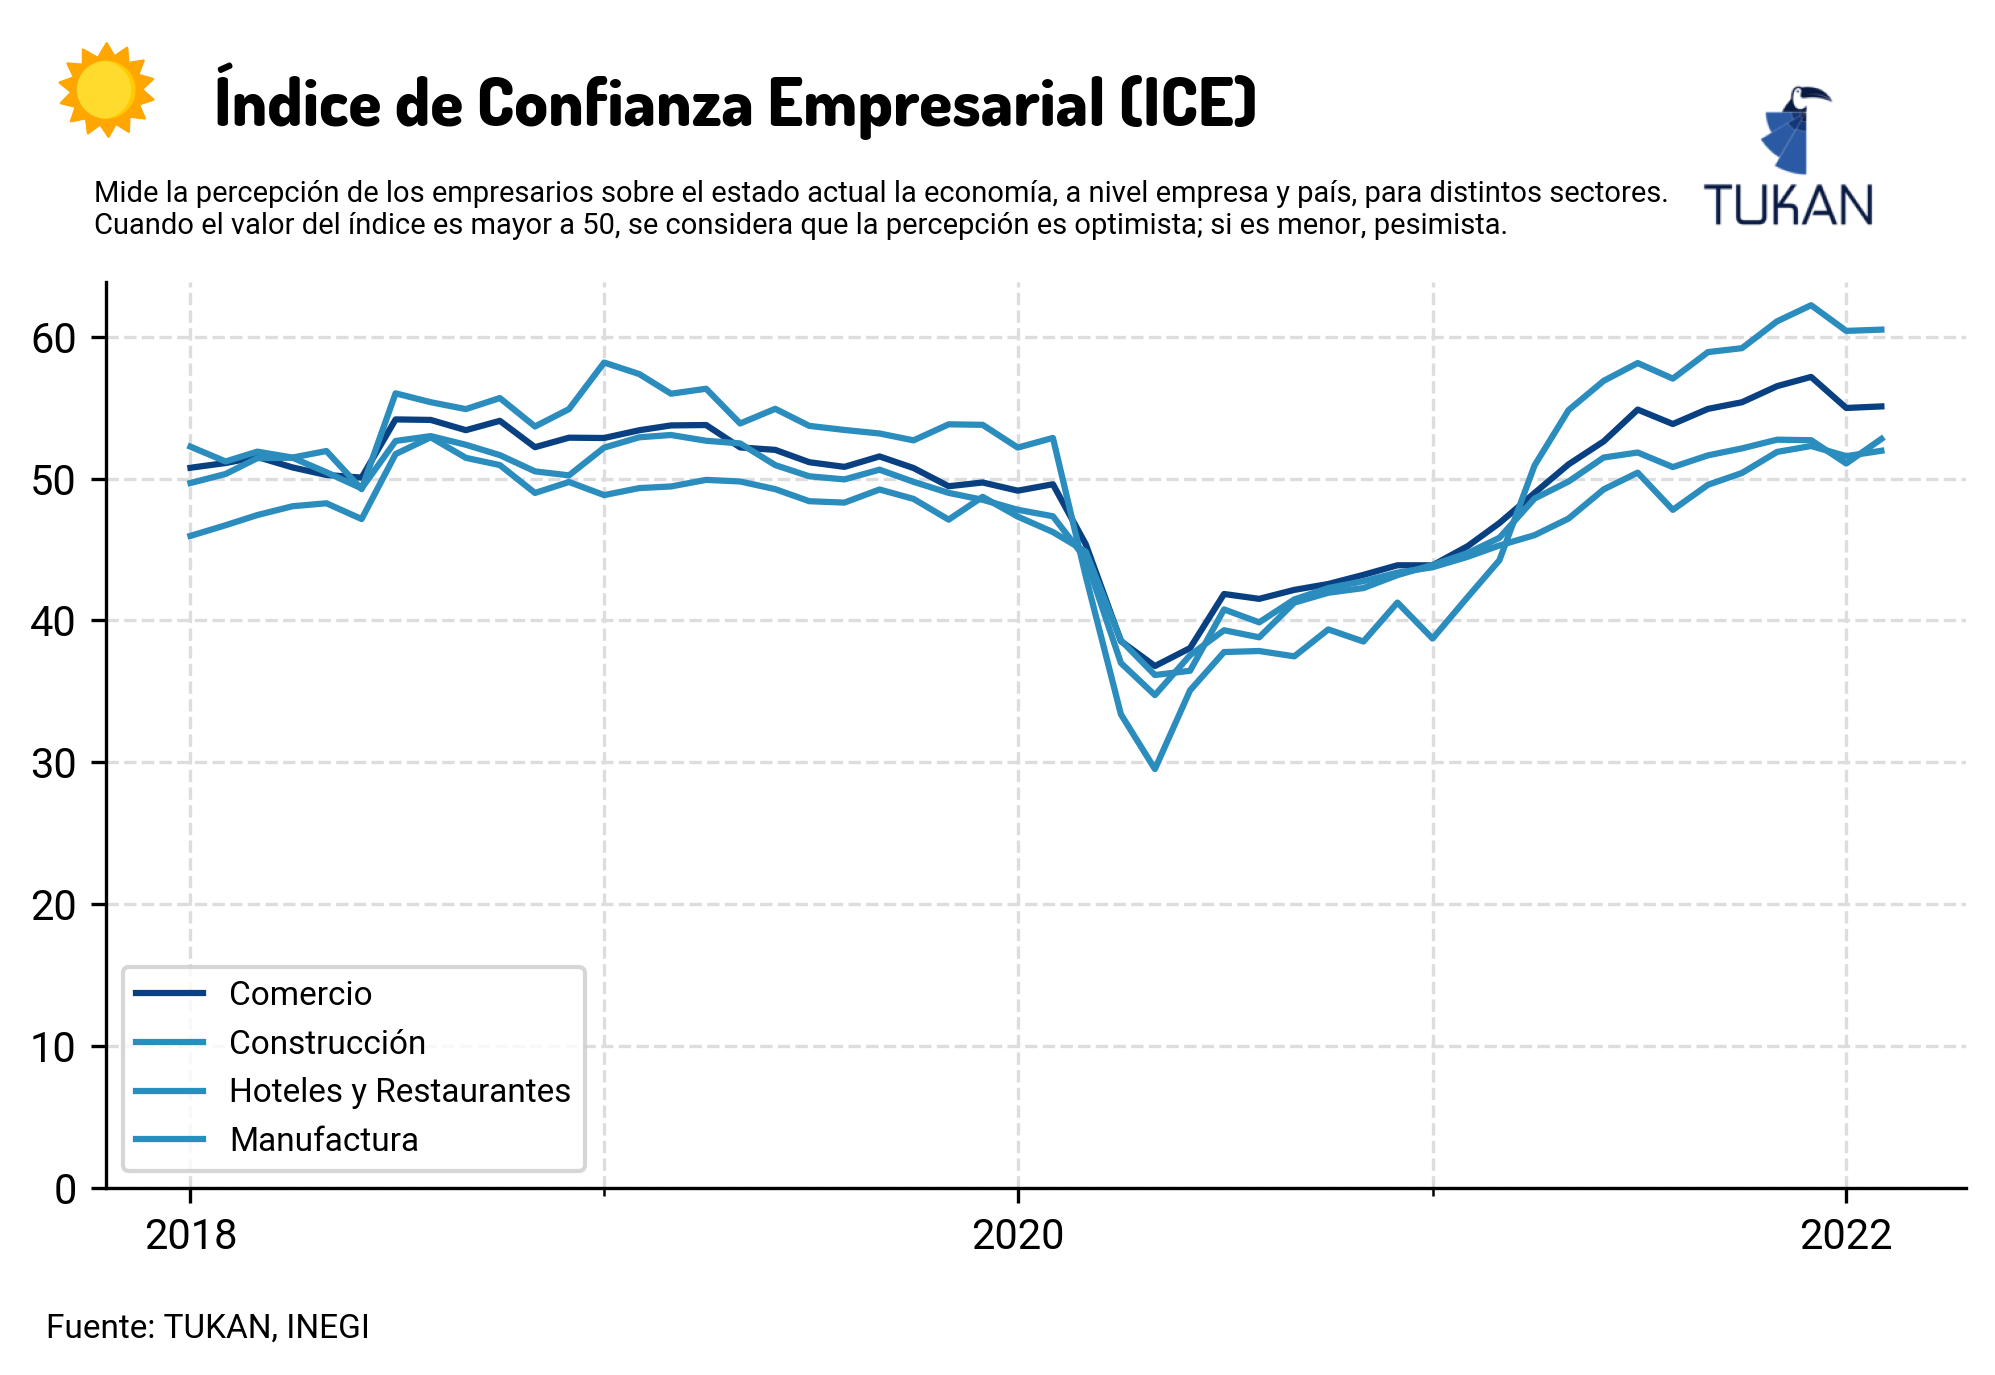

In [163]:
fig = plt.figure(dpi=300, figsize=(8,4))
ax = plt.subplot(111)

cmap = mpl.cm.get_cmap("GnBu_r", 5)

# Data to plot
aux_count = 0
for i in ice_data['economic_activity'].unique().tolist():
    aux_data = ice_data.copy()
    aux_data = aux_data[aux_data['economic_activity']==i]
    ax.plot(aux_data['date'],aux_data['value'], color = cmap(aux_count), label=str(i))
    aux_count=+1


ax.legend(fancybox = True, fontsize = 8, frameon = True)

# ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Add minor gridlines and format ticks
ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_minor_locator(mdates.YearLocator(1))

ax.grid(visible=True, which='both', linestyle='--', color = "#dddddd")

# Add gridlines and format to ticks
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:.0f}'))


ax.set_ylim(0)

icon_icon = image.imread("sunny.png")
icon_ax = fig.add_axes([0.1, 1, 0.05, 0.08], zorder=1)
icon_ax.imshow(icon_icon)
icon_ax.axis("off")


# Add title and subtitle
fig.text(
    0.17,
    1.01,
    "Índice de Confianza Empresarial (ICE)",
    size=16,
    weight = "bold",
    family = "Dosis"
)

fig.text(
    0.12,
    0.92,
    "Mide la percepción de los empresarios sobre el estado actual la economía, a nivel empresa y país, para distintos sectores. \nCuando el valor del índice es mayor a 50, se considera que la percepción es optimista; si es menor, pesimista.",
    size=7
)

# Add footer
fig.text(0.1, -0, "Fuente: TUKAN, INEGI", fontsize=8)

# Save plot with TUKAN logo, transparent and white
# plt.savefig(
#     "plots/ice_no_logo.png",
#     dpi=300,
#     bbox_inches="tight",
#     # facecolor="white",
#     edgecolor="none",
#     transparent=True,
# )

tukan_im = image.imread(module_path + "\\assets\\logo\\logo192.png")
newax = fig.add_axes([0.7, .88, 0.18, 0.21], anchor="NE", zorder=1)
newax.imshow(tukan_im)
newax.axis("off")

# plt.savefig(
#     "plots/ice_logo.png",
#     dpi=300,
#     bbox_inches="tight",
#     # facecolor="white",
#     edgecolor="none",
#     transparent=True,
# )

# plt.savefig(
#     "plots/ice_white_logo.png",
#     dpi=300,
#     bbox_inches="tight",
#     facecolor="white",
#     edgecolor="none",
#     transparent=False,
# )


Hacer grid 2x2